## Rendering Experiment Results

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = (14, 10) 

In [4]:
%store -r exp1_data
%store -r exp2_data
%store -r exp3_data
%store -r exp4_data

columns = ['Name','Acc', 'Pre', 'Rec', 'F1', 'R', 'K', 'MAE']
data = [
    ['Dice'] + exp1_data['apcf'] + [exp1_data['r'], exp1_data['k'], exp1_data['mae']],
    ['Jaccard'] + exp2_data['apcf'] + [exp2_data['r'], exp2_data['k'], exp2_data['mae']],
    ['Cosine'] + exp3_data['apcf'] + [exp3_data['r'], exp3_data['k'], exp3_data['mae']],
    ['Faucett'] + exp4_data['apcf'] + [exp4_data['r'], exp4_data['k'], exp4_data['mae']]
]

df = pd.DataFrame(data, columns=columns)
df.head()
df.to_csv('../tmp/experiment_scores_class6.csv',sep='~')

In [6]:
%store -r exp1_data_pf
%store -r exp2_data_pf
%store -r exp3_data_pf
%store -r exp4_data_pf

columns = ['Name','Acc', 'Pre', 'Rec', 'F1', 'R', 'K', 'MAE']
data = [
    ['Dice'] + exp1_data_pf['apcf'] + [exp1_data_pf['r'], exp1_data_pf['k'], exp1_data_pf['mae']],
    ['Jaccard'] + exp2_data_pf['apcf'] + [exp2_data_pf['r'], exp2_data_pf['k'], exp2_data_pf['mae']],
    ['Cosine'] + exp3_data_pf['apcf'] + [exp3_data_pf['r'], exp3_data_pf['k'], exp3_data_pf['mae']],
    ['Faucett'] + exp4_data_pf['apcf'] + [exp4_data_pf['r'], exp4_data_pf['k'], exp4_data_pf['mae']]
]

df2 = pd.DataFrame(data, columns=columns)
df2.head()
df2.to_csv('../tmp/experiment_scores_class2.csv',sep='~')

/home/che/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


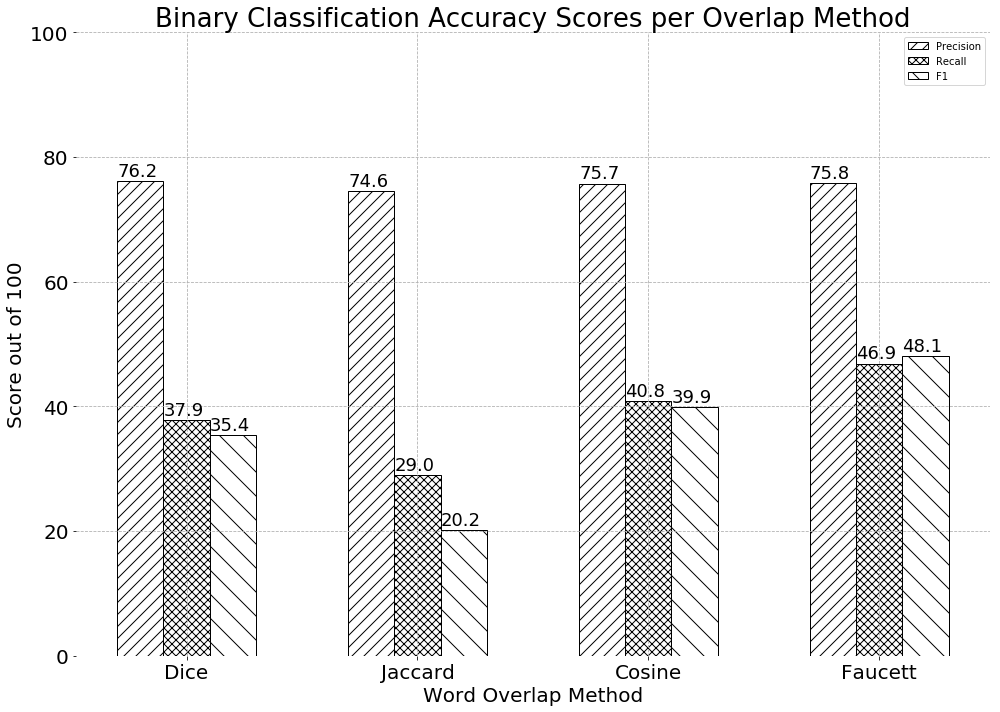

In [22]:
from cycler import cycler

# Styles
monochrome = (cycler('color', ['k']) * cycler('linestyle',
                                              ['-', '--', ':', '=.']) * cycler('marker', ['^', ',', '.']))
bar_cycle = (cycler('hatch', ['///', '--', '...', '\///', 'xxx',
                              '\\\\']) * cycler('color', 'w')*cycler('zorder', [10]))
styles = bar_cycle()


def render_aprf(data, filename, ylim):

    fig, ax = plt.subplots(1, 1)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_prop_cycle(monochrome)

    x = np.arange(len(data))
    
    # Grid Setup
    ax.grid(linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Labels
    ax.set_title('Binary Classification Accuracy Scores per Overlap Method', size=26)
    ax.set(xlabel='Word Overlap Method')
    ax.xaxis.label.set_fontsize(20)
    ax.xaxis.padlabel = 40
    ax.set(ylabel='Score out of 100')
    ax.yaxis.label.set_fontsize(20)
    
    labels = ['Precision', 'Recall', 'F1']
    

    # Render
    plt.ylim([0,ylim])
    ax.bar(x, width=0.2, height=data['Pre'] * 100, hatch='//', fill=False)
    ax.bar(x+0.2, width=0.2, height=data['Rec'] * 100, hatch='xxx', fill=False)
    ax.bar(x+0.4, width=0.2, height=data['F1'] * 100, hatch='\\', fill=False)
    plt.legend('best', labels=labels)
    
    plt.xticks(x + 0.2, data['Name'])
    
    # Add numeric values
    pos = []
    pos.append(x)
    pos.append(x+0.2)
    pos.append(x+0.4)
    pos = np.array(pos)
    
    x_pos = pd.DataFrame(pos.T, columns=['pre_pos', 'rec_pos', 'f1_pos'])
    for i in range(0, len(data)):
        pre_v = data.iloc[i]['Pre']*100
        plt.text(x=x_pos['pre_pos'].iloc[i]-0.1, y=pre_v+0.8, s='{:.1f}'.format(pre_v), size=18)
        
        rec_v = data.iloc[i]['Rec']*100
        plt.text(x=x_pos['rec_pos'].iloc[i]-0.1, y=rec_v+0.8, s='{:.1f}'.format(rec_v), size=18)
        
        f1_v = data.iloc[i]['F1']*100
        plt.text(x=x_pos['f1_pos'].iloc[i]-0.1, y=f1_v+0.8, s='{:.1f}'.format(f1_v), size=18)
    
    plt.tight_layout()
    plt.savefig('../renderings/{}.png'.format(filename))
    plt.show()
    
render_aprf(df2, filename='accuracy_summary_per_word_overlap_method_binary', ylim=100)

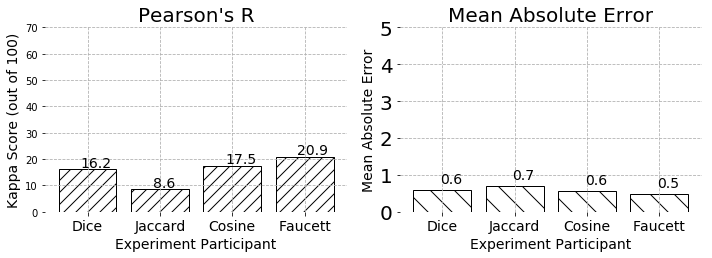

In [23]:

def compare_rkmae(df):
    
    #fig, axes = plt.subplots(3, 1, figsize=(5,10))
    axes = [0,0]
    plt.figure(figsize=(10,7))
    axes[0] = plt.subplot(221)
    # axes[1] = plt.subplot(222)
    axes[1] = plt.subplot(222)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    

    x = np.arange(len(df))
    
    # Grid Setup
    for ax in axes:
        ax.set_prop_cycle(monochrome)
        ax.grid(linestyle='--')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

    # Render
    # Graph #1 - R Score
    axes[0].bar(x, height=df['R'] * 100, hatch='//', fill=False)
    axes[0].set_title("Pearson's R", size=20)
    axes[0].set(xlabel='Experiment Participant')
    axes[0].set(ylim=[0,70])
    axes[0].xaxis.label.set_fontsize(14)
    axes[0].xaxis.padlabel = 40
    axes[0].set(ylabel='Kappa Score (out of 100)')
    axes[0].yaxis.label.set_fontsize(14)
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(df['Name'], fontsize=14)
    
    # Add numeric values
    for i in range(0, len(df)):
        value = df.iloc[i]['R']*100
        axes[0].text(x=x[i]-0.1, y=value+0.8, s='{:.1f}'.format(value), size=14)
    
    # Graph #2 - Kappa Score
    # axes[1].bar(x, height=df['K'] * 100, hatch='xxx', fill=False)
    # axes[1].set_title("Cohen's Kappa per Participant", size=20)
    # axes[1].set(xlabel='Experiment Participant')
    # axes[1].set(ylim=[0,30])
    # axes[1].xaxis.label.set_fontsize(14)
    # axes[1].xaxis.padlabel = 40
    # axes[1].set(ylabel='R-Score (out of 100)')
    # axes[1].yaxis.label.set_fontsize(14)
    # axes[1].set_xticks(x)
    # axes[1].set_xticklabels(df['Name'], fontsize=14)
    
    # Add numeric values
    # for i in range(0, len(df)):
    #    value = df.iloc[i]['K']*100
    #    axes[1].text(x=x[i]-0.1, y=value+0.8, s='{:.1f}'.format(value), size=14)
        
    # Graph #3 - MAE Score
    axes[1].bar(x, height=df['MAE'], hatch='\\', fill=False)
    axes[1].set_title("Mean Absolute Error", size=20)
    axes[1].set(xlabel='Experiment Participant')
    axes[1].set(ylim=[0,5])
    axes[1].xaxis.label.set_fontsize(14)
    axes[1].xaxis.padlabel = 40
    axes[1].set(ylabel='Mean Absolute Error')
    axes[1].yaxis.label.set_fontsize(14)
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(df['Name'], fontsize=14)
    
    # Add numeric values
    for i in range(0, len(df)):
        value = df.iloc[i]['MAE']
        axes[1].text(x=x[i]-0.03, y=value+0.2, s='{:.1f}'.format(value), size=14)
        
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=.5)
    plt.savefig('../renderings/correlations_per_word_overlap_method_binary.png')
    plt.show()

compare_rkmae(df2)